<img src="../res/hdb_mrt_image.jpg" alt="Image of MRT in front of Singapore HDB">

# Analysis of Public Transport in Residential Areas

Based on the data cleaned and processed in the notebooks named "01_*", I analysed the public transport infrastructure in each of these HDB regions.

This was then followed by the analysis of future projects planned by LTA in its [Land Transport Plan 2040](https://www.lta.gov.sg/content/ltagov/en/upcoming_projects.html#collapse-content-tab_yellow_new-RailExpansion) to see if any future projects should be expedited to improve connectivity of public transport in certain areas.

In [1]:
import geopandas as gpd
import folium
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point

from utils.constants import DATASETS, TRAIN_COLOURS
from utils.helper import getAllRecords, getDataframe
from utils.maps import createSingaporeMap

In [2]:
from dotenv import dotenv_values

config = dotenv_values("../.env.local") 
API_KEY = config["API_KEY"]

## Geographic Data

In [3]:
from utils.data_cleaning import cleanHDBDF

population2023_csv = pd.read_csv("../data/hsetod2023/population_subzone.csv")
population_per_area = cleanHDBDF(population2023_csv)
population_per_area

/home/enoch/Downloads/TTSHDSTest/Section1/notebooks/utils/data_cleaning.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Area'] = df.apply(lambda row: determine_area(row, area_list), axis=1)


,Area,population_count,PA,HDBSubzone,Type,Year
0,Ang Mo Kio,62310,[Ang Mo Kio],"[Ang Mo Kio Town Centre, Cheng San, Chong Boon...","HDB 3-Room Flats, HDB 4-Room Flats, HDB 5-Room...",2023
1,Bedok,109060,[Bedok],"[Bayshore, Bedok North, Bedok Reservoir, Bedok...","Landed Properties, Condominiums and Other Apar...",2023
2,Bishan,31600,[Bishan],"[Bishan East, Marymount, Upper Thomson]","HDB 1- and 2-Room Flats, HDB 3-Room Flats, HDB...",2023
3,Boon Lay,10100,[Jurong West],[Boon Lay Place],"HDB 1- and 2-Room Flats, HDB 3-Room Flats, HDB...",2023
4,Bukit Batok,61030,[Bukit Batok],"[Brickworks, Bukit Batok Central, Bukit Batok ...","HDB 1- and 2-Room Flats, HDB 3-Room Flats, HDB...",2023
5,Bukit Merah,68630,[Bukit Merah],"[Alexandra Hill, Alexandra North, Bukit Ho Swe...","HDB 1- and 2-Room Flats, HDB 3-Room Flats, HDB...",2023
6,Bukit Panjang,45730,[Bukit Panjang],"[Bangkit, Dairy Farm, Fajar, Jelebu, Nature Re...","HDB 3-Room Flats, HDB 4-Room Flats, HDB 5-Room...",2023
7,Bukit Timah,33170,[Bukit Timah],"[Anak Bukit, Coronation Road, Farrer Court, Hi...","HDB 1- and 2-Room Flats, HDB 3-Room Flats, HDB...",2023
8,Changi,450,[Changi],"[Changi Point, Changi West]","HDB 3-Room Flats, Landed Properties, Others, L...",2023
9,Choa Chu Kang,58880,[Choa Chu Kang],"[Choa Chu Kang Central, Choa Chu Kang North, K...","HDB 4-Room Flats, HDB 5-Room and Executive Fla...",2023


## Bus Stops Data

In [4]:
## Bus Stops
allBusStops = getAllRecords(DATASETS['busStops'], acc_key = API_KEY)
busStops_df = getDataframe(allBusStops)
busStops_df['geometry'] = busStops_df.apply(lambda row: Point(row['Longitude'], row['Latitude']), axis=1)

busStops_df

,BusStopCode,RoadName,Description,Latitude,Longitude,geometry
0,01012,Victoria St,Hotel Grand Pacific,1.296848,103.852536,POINT (103.8525359165401 1.29684825487647)
1,01013,Victoria St,St. Joseph's Ch,1.297710,103.853225,POINT (103.8532247463225 1.29770970610083)
2,01019,Victoria St,Bras Basah Cplx,1.296990,103.853022,POINT (103.8530220117251 1.29698951191332)
3,01029,Nth Bridge Rd,Opp Natl Lib,1.296673,103.854414,POINT (103.8544142246427 1.2966729849642)
4,01039,Nth Bridge Rd,Bugis Cube,1.298208,103.855491,POINT (103.8554913983741 1.29820784139683)
...,...,...,...,...,...,...
5120,99139,Changi Village Rd,Blk 5,1.388195,103.987234,POINT (103.9872338292948 1.38819494717642)
5121,99161,Nicoll Dr,Aft Changi Beach CP 3,1.390262,103.992957,POINT (103.9929566413446 1.39026180023806)
5122,99171,Nicoll Dr,Changi Beach CP 2,1.391128,103.991021,POINT (103.9910213889211 1.39112750002185)
5123,99181,Telok Paku Rd,Bef S'pore Aviation Ac,1.387754,103.988503,POINT (103.988503099751 1.38775412603923)


## Train Stops Data

In [5]:
## Train Stations

trainStation_coords = gpd.read_file("../data/RapidTransitSystemStation/TrainStationCoordinates.json")
trainStation_coords.drop_duplicates(subset="STN_NAM_DE")


from utils.data_cleaning import cleanTrainStationDF

trainStation_df = cleanTrainStationDF(dataframe = trainStation_coords)
trainStation_df

,STN_NO,TYPE,STN_NAME,GEOMETRY,COORDINATES,LINE,NUM
0,BP1,LRT,CHOA CHU KANG LRT STATION,"POLYGON ((103.74448 1.38449, 103.74465 1.38454...",POINT (103.74455 1.38482),BP,1
1,BP2,LRT,SOUTH VIEW LRT STATION,"POLYGON ((103.74543 1.38015, 103.74545 1.38019...",POINT (103.74529 1.38030),BP,2
2,BP3,LRT,KEAT HONG LRT STATION,"POLYGON ((103.74922 1.37845, 103.74923 1.37849...",POINT (103.74905 1.37861),BP,3
3,BP4,LRT,TECK WHYE LRT STATION,"POLYGON ((103.75370 1.37652, 103.75376 1.37652...",POINT (103.75370 1.37666),BP,4
4,BP5,LRT,PHOENIX LRT STATION,"POLYGON ((103.75786 1.37846, 103.75820 1.37857...",POINT (103.75803 1.37862),BP,5
...,...,...,...,...,...,...,...
210,TE25,MRT,TANJONG KATONG MRT STATION,"POLYGON ((103.89731 1.29902, 103.89753 1.29895...",POINT (103.89745 1.29936),TE,25
211,TE26,MRT,MARINE PARADE MRT STATION,"POLYGON ((103.90666 1.30382, 103.90632 1.30359...",POINT (103.90551 1.30287),TE,26
212,TE27,MRT,MARINE TERRACE MRT STATION,"POLYGON ((103.91629 1.30668, 103.91663 1.30677...",POINT (103.91532 1.30679),TE,27
213,TE28,MRT,SIGLAP MRT STATION,"POLYGON ((103.92988 1.30975, 103.92988 1.30975...",POINT (103.92988 1.30988),TE,28


## Area Coordinates Data

In [6]:
from utils.geodataframe import createAreaGeoDF

region_df = createAreaGeoDF()
region_df

,Area,geometry
0,Ang Mo Kio,"POLYGON ((103.85721 1.39654, 103.85739 1.39630..."
1,Bedok,"POLYGON ((103.93193 1.34309, 103.93550 1.33956..."
2,Bishan,"POLYGON ((103.84924 1.36275, 103.84936 1.36268..."
3,Boon Lay,"POLYGON ((103.69729 1.30754, 103.69728 1.30755..."
4,Bukit Batok,"POLYGON ((103.76408 1.37001, 103.76444 1.36947..."
...,...,...
95,Western Islands,"POLYGON ((103.71253 1.29163, 103.71258 1.29159..."
96,Western Islands 2a,"POLYGON ((103.72365 1.26884, 103.72371 1.26884..."
97,Western Water Catchment,"POLYGON ((103.69301 1.43367, 103.69339 1.43263..."
98,Woodlands,"POLYGON ((103.77664 1.45145, 103.77673 1.45150..."


## All Data Combined

In [7]:
from utils.geodataframe import cleanRegionPTDF
from utils.helper import createPTStopsDF

# Convert Numpy Dataframe to GeoDataframe
busStops_gdf = gpd.GeoDataFrame(
    busStops_df, geometry=gpd.points_from_xy(busStops_df.Longitude, busStops_df.Latitude)
)
trainStops_gdf = gpd.GeoDataFrame(
    trainStation_df, geometry=trainStation_df.GEOMETRY
)

# Spatial join to find bus stops within regions
bus_stops_count = createPTStopsDF(region_df, busStops_gdf, 'bus')

# Spatial join to find train stops within regions
train_stops_count = createPTStopsDF(region_df, trainStops_gdf, 'train')

# Get final public transport dataframe with cleaned data
regionPT_df = cleanRegionPTDF(region_df, bus_stops_df = bus_stops_count, train_stops_df = train_stops_count)
regionPT_df

,Area,geometry,bus_stops_count,train_stops_count,total_stops,normalized_stops
0,Ang Mo Kio,"POLYGON ((103.85721 1.39654, 103.85739 1.39630...",167,4,171,0.577703
1,Bedok,"POLYGON ((103.93193 1.34309, 103.93550 1.33956...",286,10,296,1.000000
2,Bishan,"POLYGON ((103.84924 1.36275, 103.84936 1.36268...",99,5,104,0.351351
3,Boon Lay,"POLYGON ((103.69729 1.30754, 103.69728 1.30755...",63,0,63,0.212838
4,Bukit Batok,"POLYGON ((103.76408 1.37001, 103.76444 1.36947...",162,6,168,0.567568
...,...,...,...,...,...,...
95,Western Islands,"POLYGON ((103.71253 1.29163, 103.71258 1.29159...",0,0,0,0.000000
96,Western Islands 2a,"POLYGON ((103.72365 1.26884, 103.72371 1.26884...",0,0,0,0.000000
97,Western Water Catchment,"POLYGON ((103.69301 1.43367, 103.69339 1.43263...",92,0,92,0.310811
98,Woodlands,"POLYGON ((103.77664 1.45145, 103.77673 1.45150...",213,6,219,0.739865


In [8]:
from utils.geodataframe import getLandArea

# Merge public transport dataframe with population count
regionPTHDB_df = pd.merge(regionPT_df, population_per_area[['Area', 'population_count']], how="outer", on="Area")

# Remove those that have no one living there
regionPTHDB_df = regionPTHDB_df[regionPTHDB_df['population_count'].notnull()].reset_index(drop=True)
regionPTHDB_df['population_count'] = regionPTHDB_df['population_count'].astype(int)
regionPTHDB_df = getLandArea(regionPTHDB_df)
regionPTHDB_df

,Area,geometry,bus_stops_count,train_stops_count,total_stops,normalized_stops,population_count,land_area-km2
0,Ang Mo Kio,"POLYGON ((103.85721 1.39654, 103.85739 1.39630...",167,4,171,0.577703,62310,14.035228
1,Bedok,"POLYGON ((103.93193 1.34309, 103.93550 1.33956...",286,10,296,1.000000,109060,21.879440
2,Bishan,"POLYGON ((103.84924 1.36275, 103.84936 1.36268...",99,5,104,0.351351,31600,7.670211
3,Boon Lay,"POLYGON ((103.69729 1.30754, 103.69728 1.30755...",63,0,63,0.212838,10100,7.785219
4,Bukit Batok,"POLYGON ((103.76408 1.37001, 103.76444 1.36947...",162,6,168,0.567568,61030,11.208184
5,Bukit Merah,"POLYGON ((103.81740 1.29433, 103.81743 1.29431...",176,9,185,0.625000,68630,14.561226
6,Bukit Panjang,"POLYGON ((103.77445 1.39029, 103.77499 1.38607...",103,12,115,0.388514,45730,9.080650
7,Bukit Timah,"POLYGON ((103.79766 1.34813, 103.79806 1.34779...",113,6,119,0.402027,33170,17.644637
8,Changi,"POLYGON ((103.98236 1.39356, 103.98242 1.39349...",91,1,92,0.310811,450,41.215764
9,Choa Chu Kang,"POLYGON ((103.74660 1.40541, 103.74691 1.40540...",116,8,124,0.418919,58880,6.158459


## Find Relationships between Factors

In [9]:
# Finding relationships between factors
regionPTHDB_df['population_density'] = regionPTHDB_df['population_count'] / regionPTHDB_df['land_area-km2']
regionPTHDB_df['bus_stops_density'] = regionPTHDB_df['bus_stops_count'] / regionPTHDB_df['land_area-km2']
regionPTHDB_df['bus_stops_per_capita'] = regionPTHDB_df['bus_stops_count'] / regionPTHDB_df['population_count']
regionPTHDB_df['train_stops_density'] = regionPTHDB_df['train_stops_count'] / regionPTHDB_df['land_area-km2']
regionPTHDB_df['train_stops_per_capita'] = regionPTHDB_df['train_stops_count'] / regionPTHDB_df['population_count']
regionPTHDB_df['total_stops_density'] = regionPTHDB_df['total_stops'] / regionPTHDB_df['land_area-km2']
regionPTHDB_df['total_stops_per_capita'] = regionPTHDB_df['total_stops'] / regionPTHDB_df['population_count']
regionPTHDB_df

,Area,geometry,bus_stops_count,train_stops_count,total_stops,normalized_stops,population_count,land_area-km2,population_density,bus_stops_density,bus_stops_per_capita,train_stops_density,train_stops_per_capita,total_stops_density,total_stops_per_capita
0,Ang Mo Kio,"POLYGON ((103.85721 1.39654, 103.85739 1.39630...",167,4,171,0.577703,62310,14.035228,4439.543141,11.898631,0.002680,0.284997,0.000064,12.183628,0.002744
1,Bedok,"POLYGON ((103.93193 1.34309, 103.93550 1.33956...",286,10,296,1.000000,109060,21.879440,4984.588318,13.071633,0.002622,0.457050,0.000092,13.528683,0.002714
2,Bishan,"POLYGON ((103.84924 1.36275, 103.84936 1.36268...",99,5,104,0.351351,31600,7.670211,4119.834661,12.907077,0.003133,0.651873,0.000158,13.558950,0.003291
3,Boon Lay,"POLYGON ((103.69729 1.30754, 103.69728 1.30755...",63,0,63,0.212838,10100,7.785219,1297.330274,8.092258,0.006238,0.000000,0.000000,8.092258,0.006238
4,Bukit Batok,"POLYGON ((103.76408 1.37001, 103.76444 1.36947...",162,6,168,0.567568,61030,11.208184,5445.128510,14.453725,0.002654,0.535323,0.000098,14.989048,0.002753
5,Bukit Merah,"POLYGON ((103.81740 1.29433, 103.81743 1.29431...",176,9,185,0.625000,68630,14.561226,4713.202064,12.086894,0.002564,0.618080,0.000131,12.704974,0.002696
6,Bukit Panjang,"POLYGON ((103.77445 1.39029, 103.77499 1.38607...",103,12,115,0.388514,45730,9.080650,5035.983011,11.342800,0.002252,1.321491,0.000262,12.664291,0.002515
7,Bukit Timah,"POLYGON ((103.79766 1.34813, 103.79806 1.34779...",113,6,119,0.402027,33170,17.644637,1879.891361,6.404212,0.003407,0.340047,0.000181,6.744259,0.003588
8,Changi,"POLYGON ((103.98236 1.39356, 103.98242 1.39349...",91,1,92,0.310811,450,41.215764,10.918153,2.207893,0.202222,0.024263,0.002222,2.232156,0.204444
9,Choa Chu Kang,"POLYGON ((103.74660 1.40541, 103.74691 1.40540...",116,8,124,0.418919,58880,6.158459,9560.832978,18.835880,0.001970,1.299026,0.000136,20.134906,0.002106


## Normalize Values

In [10]:
from utils.helper import normalizeColumn

# Normalize the relevant columns
regionPTHDB_df = normalizeColumn(regionPTHDB_df, "population_density")

# Bus
regionPTHDB_df = normalizeColumn(regionPTHDB_df, "bus_stops_density")
regionPTHDB_df = normalizeColumn(regionPTHDB_df, "bus_stops_per_capita")

# Train
regionPTHDB_df = normalizeColumn(regionPTHDB_df, "train_stops_density")
regionPTHDB_df = normalizeColumn(regionPTHDB_df, "train_stops_per_capita")

# All
regionPTHDB_df = normalizeColumn(regionPTHDB_df, "total_stops_density")
regionPTHDB_df = normalizeColumn(regionPTHDB_df, "total_stops_per_capita")

In [11]:
# Calculate the discrepancy between population density and transport stop density

# Bus
regionPTHDB_df['bus_density_discrepancy'] = regionPTHDB_df['normalized_population_density'] - regionPTHDB_df['normalized_bus_stops_density']
regionPTHDB_df = normalizeColumn(regionPTHDB_df, "bus_density_discrepancy")

# Train
regionPTHDB_df['train_density_discrepancy'] = regionPTHDB_df['normalized_population_density'] - regionPTHDB_df['normalized_train_stops_density']
regionPTHDB_df = normalizeColumn(regionPTHDB_df, "train_density_discrepancy")

# All
regionPTHDB_df['total_density_discrepancy'] = regionPTHDB_df['normalized_population_density'] - regionPTHDB_df['normalized_total_stops_density']
regionPTHDB_df = normalizeColumn(regionPTHDB_df, "total_density_discrepancy")

## Data Visualization

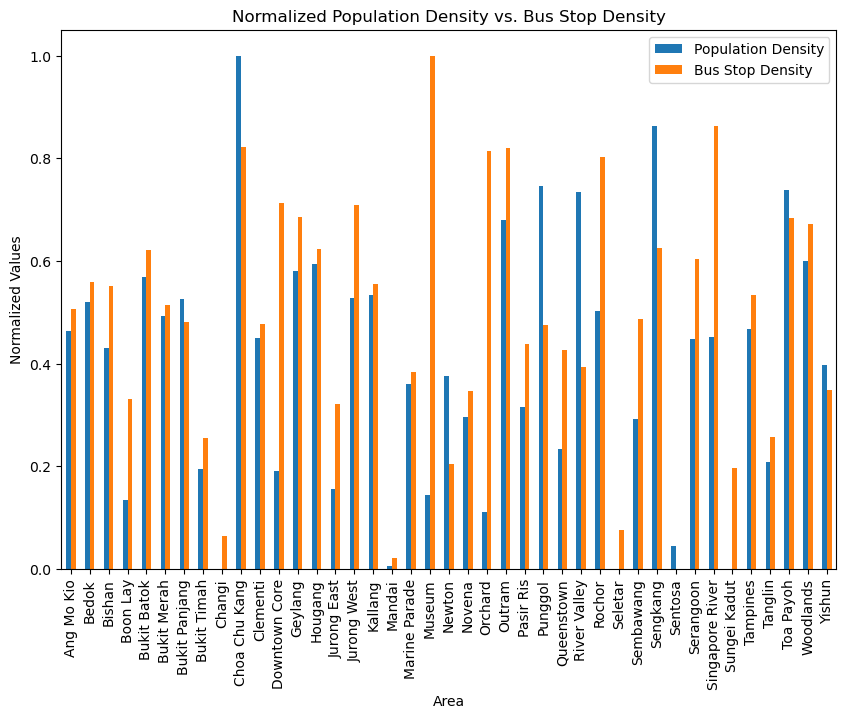

In [12]:
# Bar plot for population density vs. bus stop density
plt.figure(figsize=(10, 7))
regionPTHDB_df[['Area', 'normalized_population_density', 'normalized_bus_stops_density']].set_index('Area').plot(kind='bar', ax=plt.gca())
plt.title('Normalized Population Density vs. Bus Stop Density')
plt.ylabel('Normalized Values')
plt.legend(['Population Density', 'Bus Stop Density'])

plt.show()

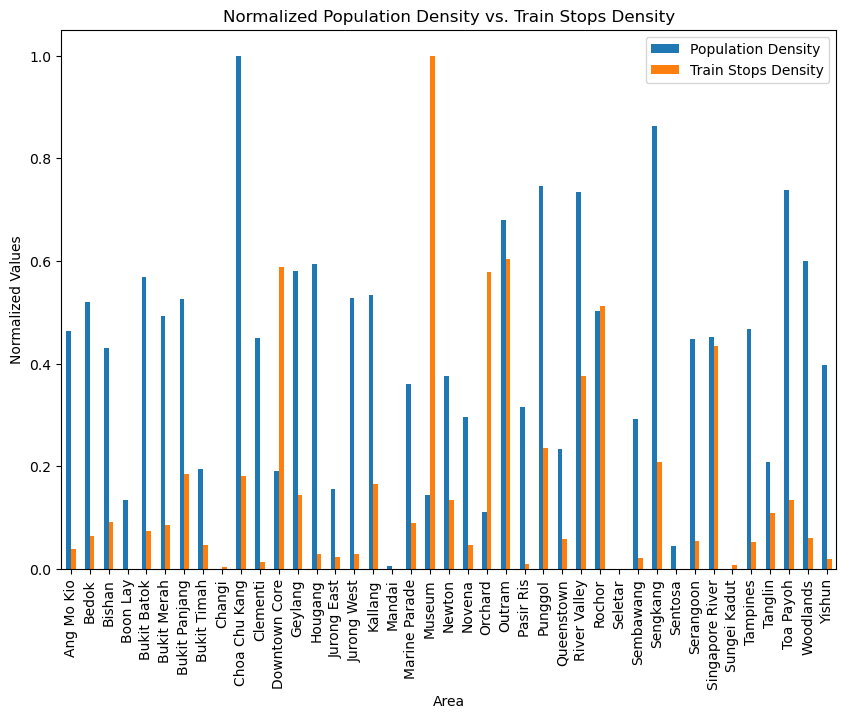

In [13]:
# Bar plot for population density vs. train stop density
plt.figure(figsize=(10, 7))
regionPTHDB_df[['Area', 'normalized_population_density', 'normalized_train_stops_density']].set_index('Area').plot(kind='bar', ax=plt.gca())
plt.title('Normalized Population Density vs. Train Stops Density')
plt.ylabel('Normalized Values')
plt.legend(['Population Density', 'Train Stops Density'])

plt.show()

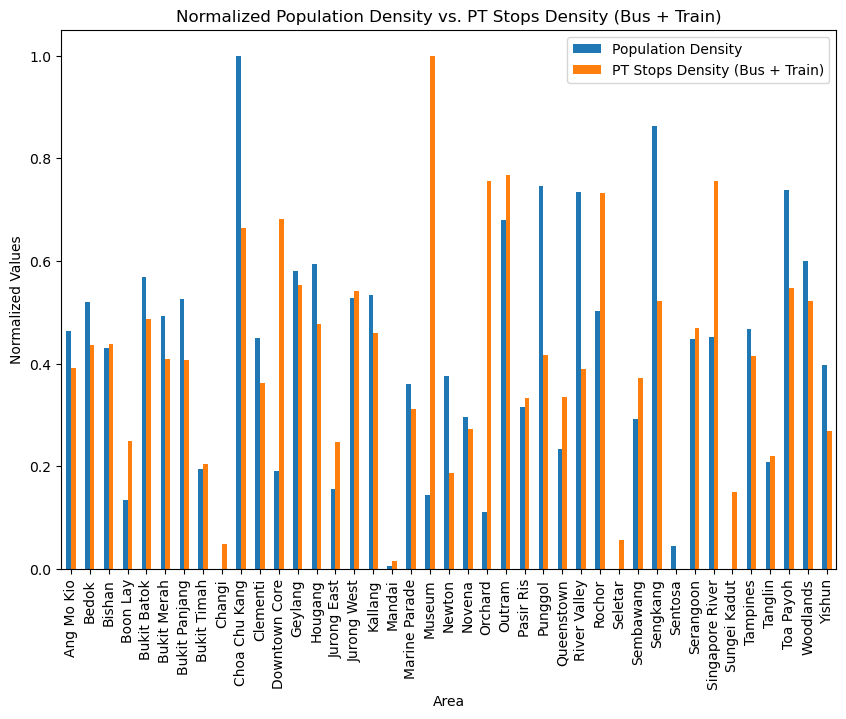

In [14]:
# Bar plot for population density vs. total stop density
plt.figure(figsize=(10, 7))
regionPTHDB_df[['Area', 'normalized_population_density', 'normalized_total_stops_density']].set_index('Area').plot(kind='bar', ax=plt.gca())
plt.title('Normalized Population Density vs. PT Stops Density (Bus + Train)')
plt.ylabel('Normalized Values')
plt.legend(['Population Density', 'PT Stops Density (Bus + Train)'])

plt.show()

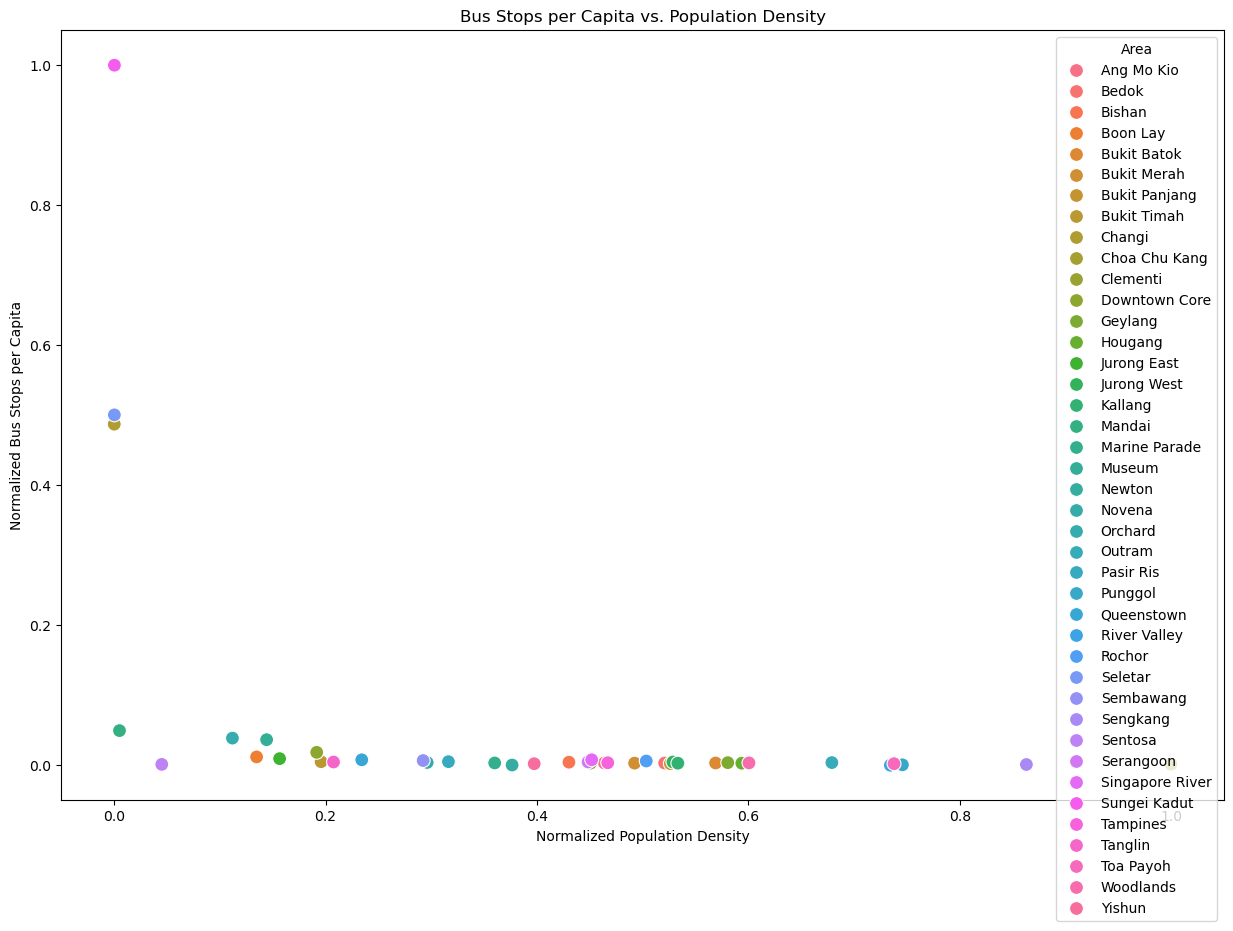

In [15]:
# Scatter plot for stops per capita vs. population density
plt.figure(figsize=(15, 10))
# plt.plot(2, 1, 2)
sns.scatterplot(data=regionPTHDB_df, x='normalized_population_density', y='normalized_bus_stops_per_capita', hue='Area', s=100)
plt.title('Bus Stops per Capita vs. Population Density')
plt.xlabel('Normalized Population Density')
plt.ylabel('Normalized Bus Stops per Capita')

# plt.tight_layout()
plt.show()

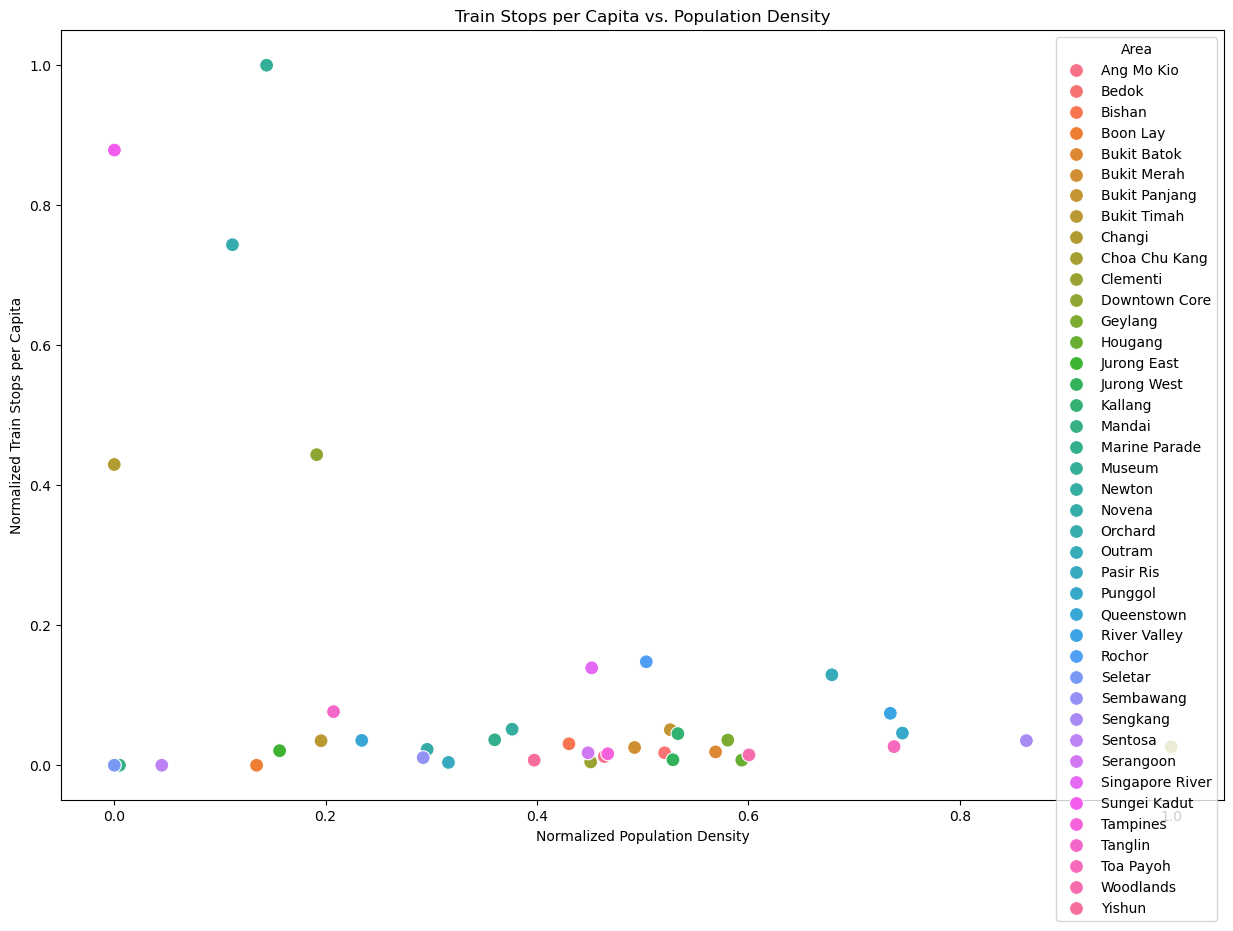

In [16]:
# Scatter plot for stops per capita vs. population density
plt.figure(figsize=(15, 10))
# plt.plot(2, 1, 2)
sns.scatterplot(data=regionPTHDB_df, x='normalized_population_density', y='normalized_train_stops_per_capita', hue='Area', s=100)
plt.title('Train Stops per Capita vs. Population Density')
plt.xlabel('Normalized Population Density')
plt.ylabel('Normalized Train Stops per Capita')

# plt.tight_layout()
plt.show()

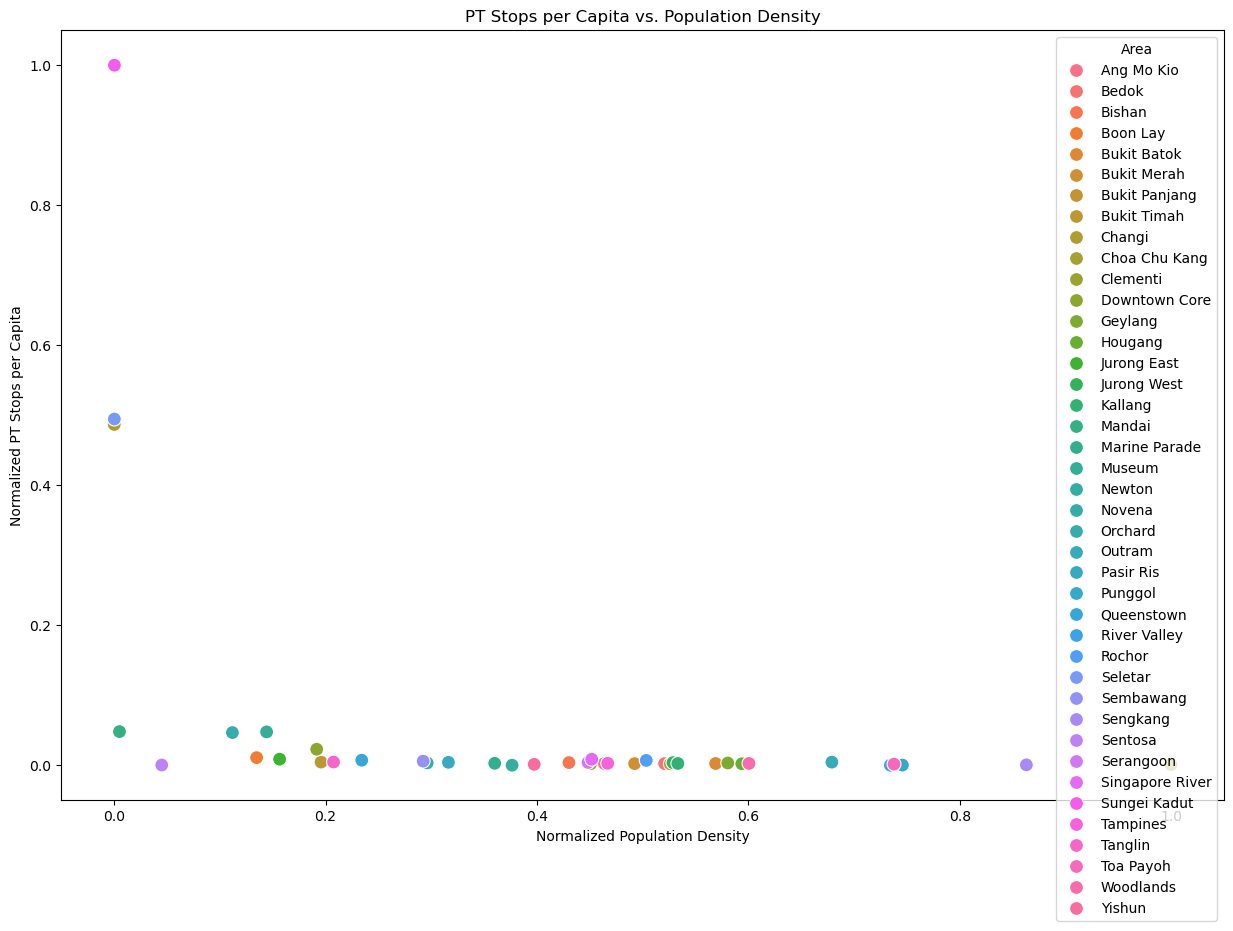

In [17]:
# Scatter plot for stops per capita vs. population density
plt.figure(figsize=(15, 10))
# plt.plot(2, 1, 2)
sns.scatterplot(data=regionPTHDB_df, x='normalized_population_density', y='normalized_total_stops_per_capita', hue='Area', s=100)
plt.title('PT Stops per Capita vs. Population Density')
plt.xlabel('Normalized Population Density')
plt.ylabel('Normalized PT Stops per Capita')

# plt.tight_layout()
plt.show()

In [18]:
from utils.printer import printTopUnderservedAreas
from utils.helper import getDensityDiscrepancyDF

# Create dataframe for density discrepancy for each category
dd_bus_df = getDensityDiscrepancyDF(regionPTHDB_df, "bus")
dd_train_df = getDensityDiscrepancyDF(regionPTHDB_df, "train")
dd_total_df = getDensityDiscrepancyDF(regionPTHDB_df, "total")

# Highlight areas needing more PT stops based on density discrepancy
printTopUnderservedAreas(dd_bus_df, "bus", num_rows = 10)
printTopUnderservedAreas(dd_train_df, "train", num_rows = 10)
printTopUnderservedAreas(dd_total_df, "total", num_rows = 10)

Top 10 Areas Needing More Bus Stops:
            Area  bus_density_discrepancy
0   River Valley                 0.341375
1        Punggol                 0.270661
2       Sengkang                 0.237735
3  Choa Chu Kang                 0.177735
4         Newton                 0.172665
5      Toa Payoh                 0.054777
6         Yishun                 0.048106
7  Bukit Panjang                 0.045836
8        Sentosa                 0.044983

Top 10 Areas Needing More Train Stops:
            Area  train_density_discrepancy
0  Choa Chu Kang                   0.819032
1       Sengkang                   0.654291
2      Toa Payoh                   0.602532
3        Hougang                   0.564032
4      Woodlands                   0.539622
5        Punggol                   0.509680
6    Jurong West                   0.500403
7    Bukit Batok                   0.494456
8          Bedok                   0.457136
9        Geylang                   0.437056

Top 10 Areas Needi

## Visualizing areas that require more public transport facilities

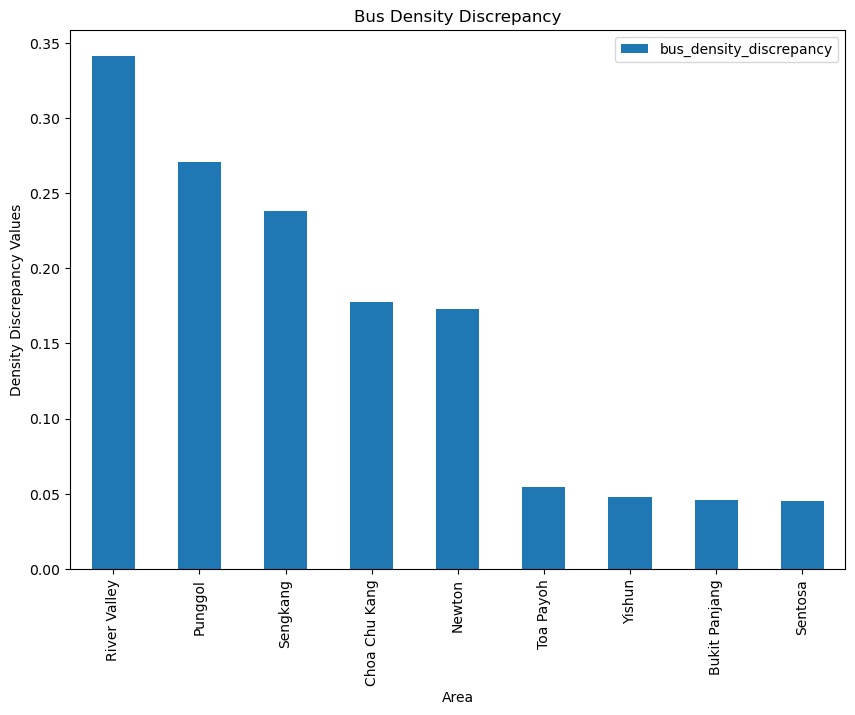

In [19]:
# Bar plot for bus density discrepancy in areas
plt.figure(figsize=(10, 7))
dd_bus_df[['Area', 'bus_density_discrepancy']].set_index('Area').plot(kind='bar', ax=plt.gca())
plt.title('Bus Density Discrepancy')
plt.ylabel('Density Discrepancy Values')

plt.show()

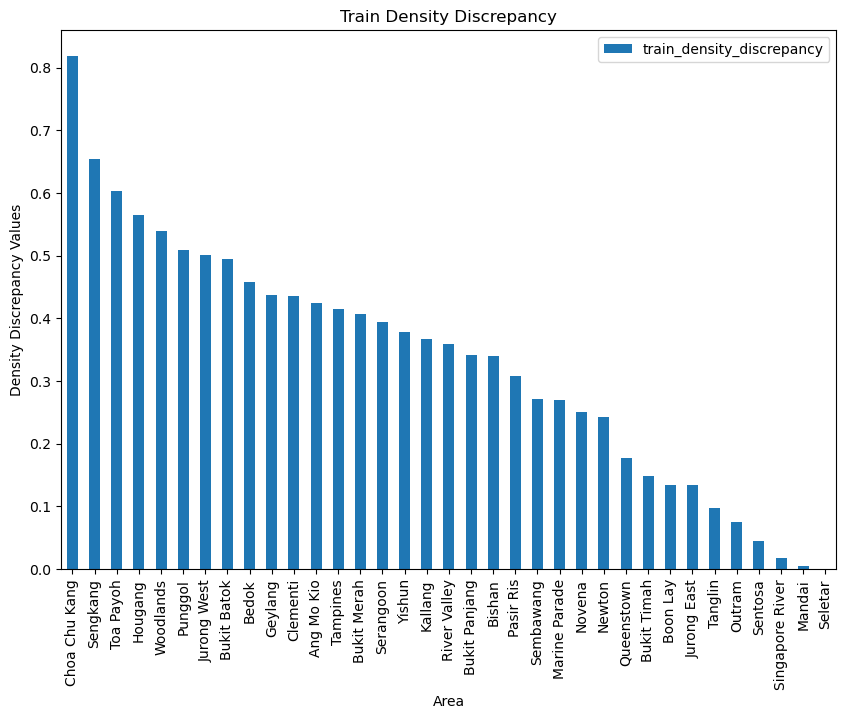

In [20]:
# Bar plot for train density discrepancy in areas
plt.figure(figsize=(10, 7))
dd_train_df[['Area', 'train_density_discrepancy']].set_index('Area').plot(kind='bar', ax=plt.gca())
plt.title('Train Density Discrepancy')
plt.ylabel('Density Discrepancy Values')

plt.show()

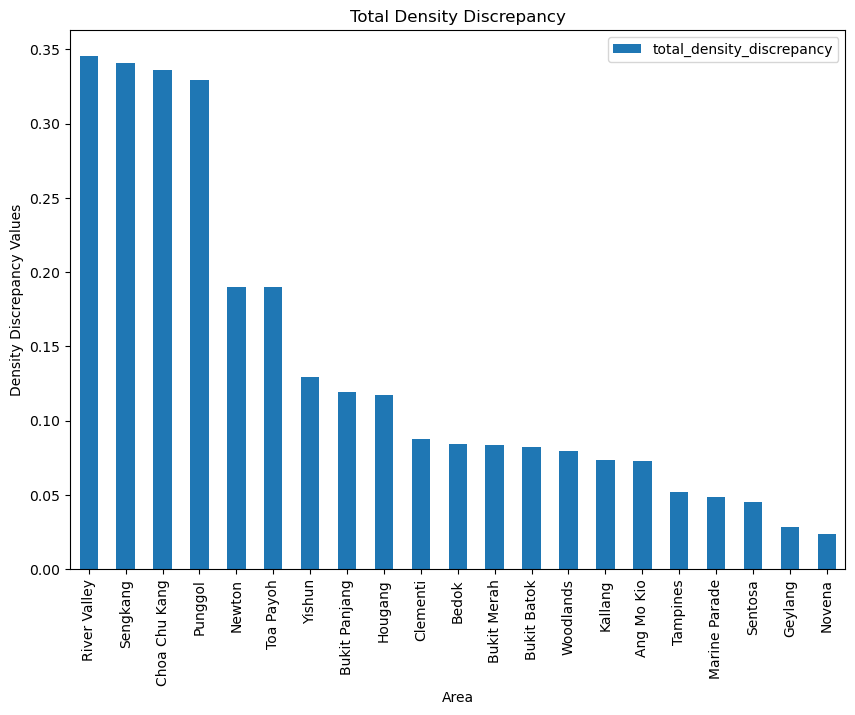

In [21]:
# Bar plot for PT density discrepancy in areas
plt.figure(figsize=(10, 7))
dd_total_df[['Area', 'total_density_discrepancy']].set_index('Area').plot(kind='bar', ax=plt.gca())
plt.title('Total Density Discrepancy')
plt.ylabel('Density Discrepancy Values')

plt.show()

## Bus Stop Density Discrepancy

In [22]:
from utils.geodataframe import addDensityHeatmap

singapore_map = createSingaporeMap()

# Bus Stop Density Discrepancy
bus_density_map = addDensityHeatmap(regionPTHDB_df, singapore_map, pt_type = 'bus')

bus_density_map.save("../report/bus_density_map.html")
bus_density_map

## Train Stop Density Discrepancy

In [23]:
singapore_map = createSingaporeMap()

# Train Stop Density Discrepancy
train_density_map = addDensityHeatmap(regionPTHDB_df, singapore_map, pt_type = 'train')

train_density_map.save("../report/train_density_map.html")
train_density_map

## All PT Stop Density Discrepancy

In [24]:
singapore_map = createSingaporeMap()

# PT Stop Density Discrepancy
total_density_map = addDensityHeatmap(regionPTHDB_df, singapore_map, pt_type = 'total')

total_density_map.save("../report/total_density_map.html")
total_density_map

## Future Railway Plans by LTA

<img src="../res/UpcomingMRTLinesTimeline.png" alt="Future Plans for MRT Lines">

### Jurong Region Line (JRL)

Phase 1 – Jurong Region Line (West) –  2027

    JS1/NS4/BP1  Choa Chu Kang
    JS2 Choa Chu Kang West
    JS3 Tengah
    JS4 Hong Kah
    JS5 Corporation
    JS6 Jurong West
    JS7 Bahar Junction
    JS8/EW27  Boon Lay
    JW1 Gek Poh
    JW2 Tawas

	
Phase 2 – Jurong Region Line (East) – 2028

    JE1 Tengah Plantation
    JE2 Tengah Park
    JE3 Bukit Batok West
    JE4 Toh Guan
    JE5/EW24/NS1  Jurong East
    JE6 Jurong Town Hall
    JE7 Pandan Reservoir

	
Phase 3 – Jurong Region Line (West) Extension – 2029

    JS9 Enterprise
    JS10 Tukang
    JS11 Jurong Hill
    JS12 Jurong Pier
    JW3 Nanyang Gateway
    JW4 Nanyang Crescent
    JW5 Peng Kang Hill


### Cross Island Line (CRL)

Phase 1 – 2030

    CR2 Aviation Park
    CR3 Loyang
    CR4 Pasir Ris East
    CR5/EW1 Pasir Ris
    CR6 Tampines North
    CR7 Defu
    CR8/NE14 Hougang
    CR9 Serangoon North
    CR10 Tavistock
    CR11/NS16 Ang Mo Kio
    CR12 Teck Ghee
    CR13/TE7 Bright Hill

Punggol Extension – 2032

    CP1/CR5/EW1 Pasir Ris
    CP2 Elias
    CP3/PE4 Riviera
    CP4/NE17/PTC Punggol

Phase 2 – 2032

    CR14 Turf City
    CR15/DT6 King Albert Park
    CR16 Maju
    CR17/EW23 Clementi
    CR18 West Coast
    CR19 Jurong Lake District



```
Top 5 Areas Needing More Train Stops:
            Area  train_density_discrepancy
0  Choa Chu Kang                   0.819032
1       Sengkang                   0.654291
2      Toa Payoh                   0.602532
3        Hougang                   0.564032
4      Woodlands                   0.539622
5        Punggol                   0.509680
6    Jurong West                   0.500403
7    Bukit Batok                   0.494456
8          Bedok                   0.457136
9        Geylang                   0.437056

```

<br/>
Based on the upcoming projects that LTA has planned in building more MRT lines, the following projects should be expedited in this order to meet the demand of population living in that area:<br/><br/>
1. Jurong Region Line (Phase 1, Phase 2)<br/>
2. Cross Region Line (Phase 1, Punggol Extension)<br/>
3. TEL Stage 5<br/>
4. DTL Extension<br/>